# **Project: Pharmaceutical Sales Forecasting & Market Intelligence**

## **Phase 1: Data Cleaning & Preprocessing**

### Step 1: Setup & Environment

**Objective:** Import the tools (libraries) we need to work with data.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This command just sets a nice visual style for the charts we'll make later
sns.set(style="whitegrid")

print("Step 1 Complete: All libraries are imported.")

Step 1 Complete: All libraries are imported.


In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("milanzdravkovic/pharma-sales-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pharma-sales-data' dataset.
Path to dataset files: /kaggle/input/pharma-sales-data


In [26]:
import os

path = "/root/.cache/kagglehub/datasets/milanzdravkovic/pharma-sales-data/versions/1"

# 1. Define the names of all the files you want to load
csv_file_names = [
    "salesdaily.csv",
    "saleshourly.csv",
    "salesmonthly.csv",
    "salesweekly.csv"
]

print(f"Loading data from directory: {path}\n")

# A dictionary to hold all our dataframes
dataframes = {}

# 2. Loop through each file name in the list
for csv_file in csv_file_names:
    # 3. Create the full file path for the current file
    full_file_path = os.path.join(path, csv_file)

    print(f"--- Loading file: {csv_file} ---")

    try:
        # 4. Load the current CSV into a pandas DataFrame
        df = pd.read_csv(full_file_path)

        # 5. Store the dataframe in our dictionary
        dataframes[csv_file] = df

        # 6. Show the first 5 rows to confirm it loaded correctly
        print("Successfully loaded! Here are the first 5 rows:")
        print(df.head())
        print("\n" + "="*30 + "\n") # Add a separator

    except FileNotFoundError:
        print(f"Error: File not found at {full_file_path}")
        print("Please check that the path and filename are correct.\n")
    except Exception as e:
        print(f"An error occurred while loading {csv_file}: {e}\n")

Loading data from directory: /root/.cache/kagglehub/datasets/milanzdravkovic/pharma-sales-data/versions/1

--- Loading file: salesdaily.csv ---
Successfully loaded! Here are the first 5 rows:
      datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday  


--- Loading file: saleshourly.csv ---
Successfully loaded! Here are the first 5 rows:
            datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C  R03  R06  Year  \
0   1/2/2014 8:00    0.0   0.6

### Step 2: Analyze and Plot Monthly Sales


--- Analyzing Monthly Sales Trends ---
Converted 'datum' to datetime and set as index.

Successfully created plot and saved it as 'monthly_sales_trends.png'
You can view this image file in your notebook environment.


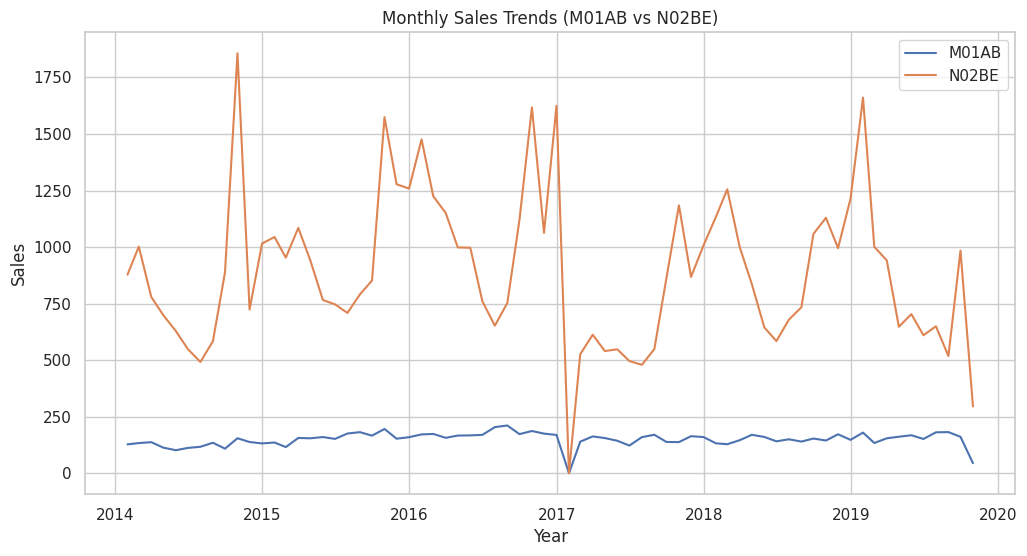

In [27]:
if "salesmonthly.csv" in dataframes:
    print("\n--- Analyzing Monthly Sales Trends ---")

    # Get the monthly dataframe
    df_monthly = dataframes["salesmonthly.csv"]

    # 1. Convert the 'datum' column to datetime objects
    # This is crucial for plotting time series data correctly
    df_monthly['datum'] = pd.to_datetime(df_monthly['datum'])

    # 2. Set the 'datum' column as the index
    df_monthly.set_index('datum', inplace=True)

     # --- Sort the index ---
    # Sorting the index is crucial for time-based slicing to work reliably
    df_monthly.sort_index(inplace=True)

    print("Converted 'datum' to datetime and set as index.")

    # 3. Plot the sales of a few drug classes
    plt.figure(figsize=(12, 6))
    plt.plot(df_monthly.index, df_monthly['M01AB'], label='M01AB')
    plt.plot(df_monthly.index, df_monthly['N02BE'], label='N02BE')

    plt.title('Monthly Sales Trends (M01AB vs N02BE)')
    plt.xlabel('Year')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)

    # 4. Save the plot to a file
    plot_filename = "monthly_sales_trends.png"
    plt.savefig(plot_filename)

    print(f"\nSuccessfully created plot and saved it as '{plot_filename}'")
    print("You can view this image file in your notebook environment.")

    # To display the plot in a notebook, you would just run:
    # plt.show()

    n02be_sales = df_monthly['N02BE']

else:
    print("\nCould not perform analysis: 'salesmonthly.csv' was not loaded.")

Looking at the plot, we can see two interesting things:

1. The sales for N02BE (orange line) are much higher and more varied than for M01AB.

2. N02BE sales look seasonal. They seem to peak in the winter and drop in the summer.

For the next step, let's prove that seasonal theory. We can analyze the salesmonthly.csv data to see which months, on average, have the highest sales.

### Step 3: Analyze Seasonality of N02BE


--- STEP 3: Analyzing Seasonality of N02BE ---
Calculated average sales per month for N02BE.
Successfully created seasonality bar chart and saved it as 'seasonal_sales_plot.png'


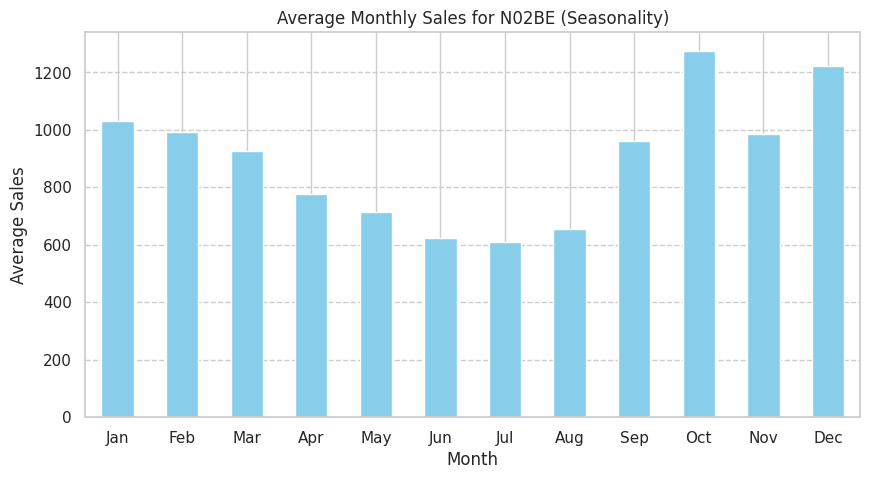

In [28]:
print("\n--- STEP 3: Analyzing Seasonality of N02BE ---")

# 1. Create a new column 'month' from the index
df_monthly['month'] = df_monthly.index.month

# 2. Group by this 'month' column and calculate the mean sales for N02BE
seasonal_sales = df_monthly.groupby('month')['N02BE'].mean()

# 3. Create month names for a nicer plot
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonal_sales.index = month_names

print("Calculated average sales per month for N02BE.")

# 4. Plot the seasonal sales as a bar chart
plt.figure(figsize=(10, 5))
seasonal_sales.plot(kind='bar', color='skyblue')

plt.title('Average Monthly Sales for N02BE (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=0) # Keep month names horizontal
plt.grid(axis='y', linestyle='--')

# 5. Save the new plot to a file
seasonal_plot_filename = "seasonal_sales_plot.png"
plt.savefig(seasonal_plot_filename)

print(f"Successfully created seasonality bar chart and saved it as '{seasonal_plot_filename}'")

The plot clearly shows that, on average, sales for the N02BE drug class are:

1. Highest in the fall and winter months (October, December, January).

2. Lowest in the summer months (June and July)

### Step 4: Analyze Hourly Sales Trends


--- STEP 4: Analyzing Hourly Sales Trends ---
Calculated average sales per hour for N02BE.
Successfully created hourly sales bar chart and saved it as 'hourly_sales_plot.png'


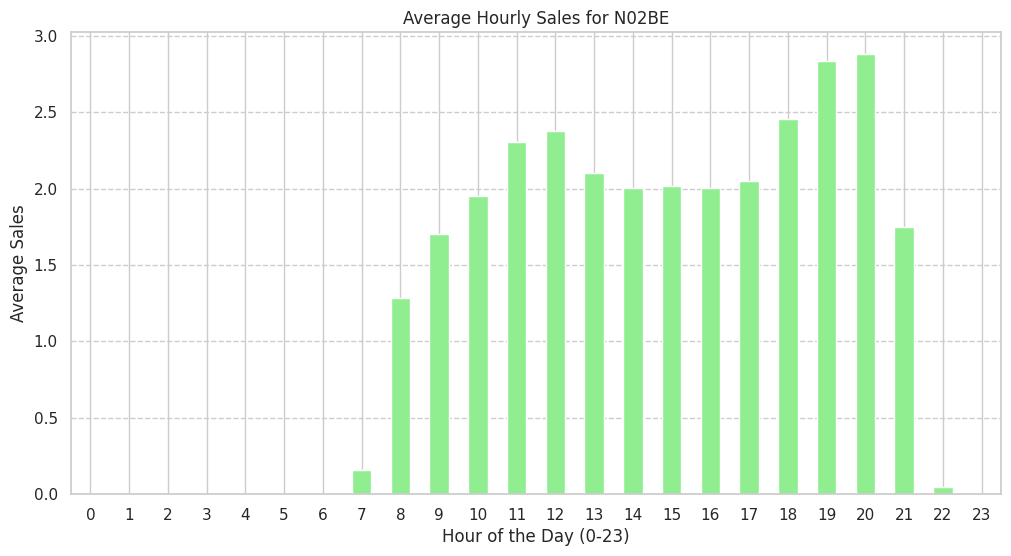

In [29]:
if "saleshourly.csv" in dataframes:
    print("\n--- STEP 4: Analyzing Hourly Sales Trends ---")

    # 1. Get the hourly dataframe
    df_hourly = dataframes["saleshourly.csv"]

    # 2. Group by the 'Hour' column and calculate the mean sales for N02BE
    # We'll focus on N02BE again to see if its pattern is different
    hourly_sales = df_hourly.groupby('Hour')['N02BE'].mean()

    print("Calculated average sales per hour for N02BE.")

    # 3. Plot the hourly sales as a bar chart
    plt.figure(figsize=(12, 6))
    hourly_sales.plot(kind='bar', color='lightgreen')

    plt.title('Average Hourly Sales for N02BE')
    plt.xlabel('Hour of the Day (0-23)')
    plt.ylabel('Average Sales')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')

    # 4. Save the new plot to a file
    hourly_plot_filename = "hourly_sales_plot.png"
    plt.savefig(hourly_plot_filename)

    print(f"Successfully created hourly sales bar chart and saved it as '{hourly_plot_filename}'")

else:
    print("\nCould not perform analysis: 'saleshourly.csv' was not loaded.")

This plot gives us a clear "daily schedule" for sales:

* Sales start picking up around 7 AM.

* There's a big peak around noon (12:00) and another, even bigger one in the evening around 7 PM (19:00).

* Things quiet down after 9 PM (21:00).

## **Phase 2: Forecasting**

### Step 5: Time Series Forecasting.

We'll use the salesmonthly.csv data for N02BE (which we know has strong seasonality) and build a model to forecast its sales for the next 12 months.

Successfully imported SARIMAX for forecasting.

--- STEP 5: Forecasting N02BE Sales ---
Fitting the SARIMA model... (This may take a moment)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


Model fitting complete. Forecast generated.
Successfully created forecast plot and saved it as 'forecast_plot.png'


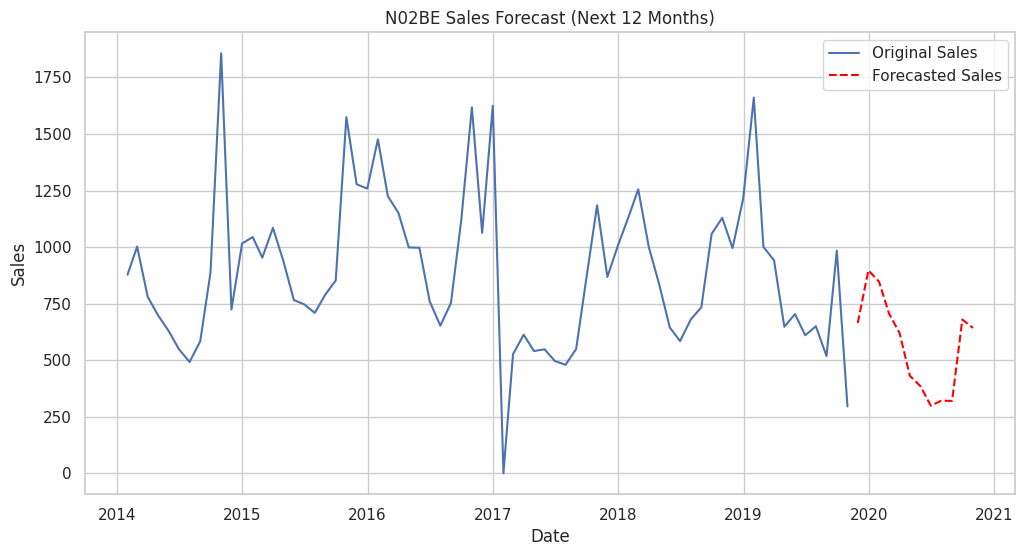

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
STATSMODELS_INSTALLED = True
print("Successfully imported SARIMAX for forecasting.")

if n02be_sales is not None:
    print("\n--- STEP 5: Forecasting N02BE Sales ---")

    try:
        # 1. Define the SARIMA model
        # We're using a common (p,d,q)(P,D,S,m) model for monthly seasonal data
        # (1,1,1) for non-seasonal part
        # (1,1,1,12) for seasonal part (12 months)
        model = SARIMAX(n02be_sales,
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 12))

        # 2. Fit the model to the data
        # This may take a few seconds
        print("Fitting the SARIMA model... (This may take a moment)")
        model_fit = model.fit(disp=False) # disp=False turns off verbose logging

        # 3. Generate a forecast for the next 12 months
        forecast = model_fit.forecast(steps=12)

        print("Model fitting complete. Forecast generated.")

        # 4. Plot the original data and the forecast
        plt.figure(figsize=(12, 6))
        plt.plot(n02be_sales, label='Original Sales')
        plt.plot(forecast, label='Forecasted Sales', color='red', linestyle='--')

        plt.title('N02BE Sales Forecast (Next 12 Months)')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)

        # 5. Save the forecast plot
        forecast_plot_filename = "forecast_plot.png"
        plt.savefig(forecast_plot_filename)

        print(f"Successfully created forecast plot and saved it as '{forecast_plot_filename}'")

    except ImportError:
        print("\n--- ERROR for Step 5 ---")
        print("The 'statsmodels' library is required for forecasting.")
        print("Please install it (e.g., 'pip install statsmodels') and run the script again.")
    except Exception as e:
        print(f"\nAn error occurred during Step 5 (Forecasting): {e}")

else:
    print("\nSkipping Step 5 (Forecasting) because monthly sales data was not loaded.")

The red dashed line is model's prediction for the next 12 months, and it has clearly learned the seasonal pattern we found in Step 3-it predicts a dip in the summer and a recovery in the winter, just like the historical data.

## **Phase 3: Market Share Analysis**

### Step 6: Pie Chart


--- STEP 6: Analyzing Market Share (2019) ---
Calculated total sales for each drug class in 2019.
Successfully created market share pie chart and saved it as 'market_share_2019.png'


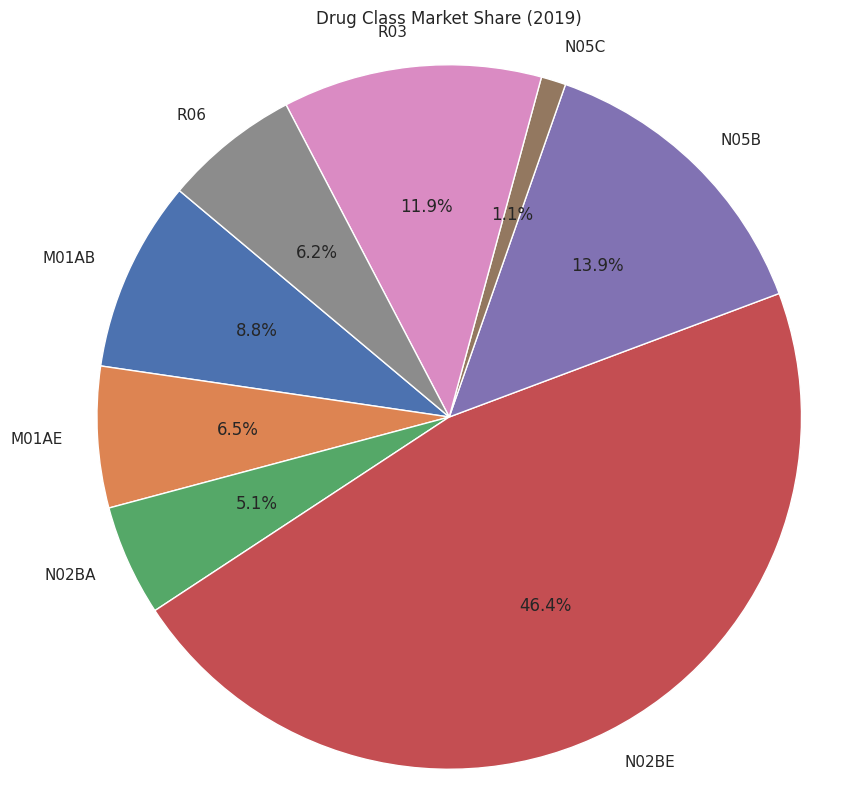

In [32]:
if "salesmonthly.csv" in dataframes:
    print("\n--- STEP 6: Analyzing Market Share (2019) ---")

    try:
        # 1. Filter the data to get only 2019
        df_2019 = df_monthly.loc['2019']

        # 2. Calculate the total sales for the year for each drug class
        # We drop the 'month' column we added earlier
        yearly_sales = df_2019.drop(columns=['month']).sum()

        # 3. Filter out any classes with zero or negative sales to make a clean pie chart
        yearly_sales = yearly_sales[yearly_sales > 0]

        print("Calculated total sales for each drug class in 2019.")

        # 4. Create the pie chart
        plt.figure(figsize=(10, 10))
        plt.pie(
            yearly_sales,
            labels=yearly_sales.index,
            autopct='%1.1f%%', # Show percentage
            startangle=140
        )

        plt.title('Drug Class Market Share (2019)')
        plt.axis('equal') # Ensures the pie is a circle

        # 5. Save the pie chart
        pie_chart_filename = "market_share_2019.png"
        plt.savefig(pie_chart_filename)

        print(f"Successfully created market share pie chart and saved it as '{pie_chart_filename}'")

    except Exception as e:
        print(f"\nAn error occurred during Step 6 (Market Share): {e}")

else:
    print("\nSkipping Step 6 (Market Share) because monthly sales data was not loaded.")

This gives us a very clear picture of the market:

* Market Leader: N02BE is the dominant drug class, making up 46.4% of all sales. This confirms why we've been focusing on it!

* Secondary Players: N05B (13.9%) and R03 (11.9%) are the next biggest segments.

* Minor Players: All other classes have less than 10% market share each.

## **Phase 4: Daily Pattern Analysis**

### Step 7: Weekday vs. Weekend Sales.

We'll use the salesdaily.csv file to see if sales behavior changes on weekends. This could be useful for staffing or marketing.


--- STEP 7: Analyzing Weekday vs. Weekend Sales ---
Calculated average sales for N02BE on weekdays vs. weekends.
Successfully created comparison plot and saved it as 'weekday_vs_weekend_sales.png'


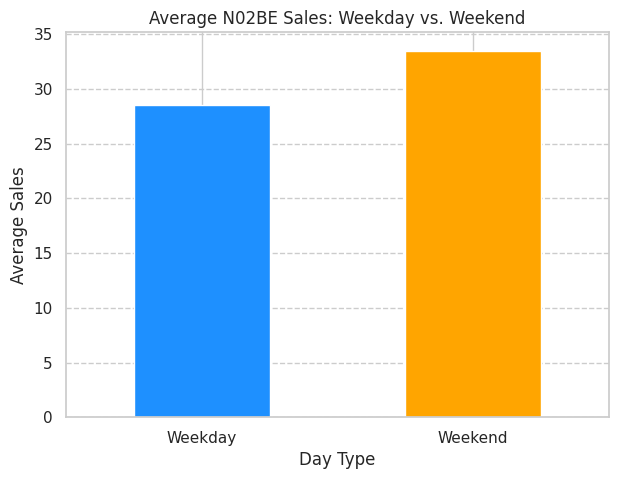

In [33]:
if "salesdaily.csv" in dataframes:
    print("\n--- STEP 7: Analyzing Weekday vs. Weekend Sales ---")

    try:
        # 1. Get the daily sales dataframe
        df_daily = dataframes["salesdaily.csv"]

        # 2. Define a function to classify day type
        def get_day_type(weekday_name):
            if weekday_name in ['Saturday', 'Sunday']:
                return 'Weekend'
            else:
                return 'Weekday'

        # 3. Apply the function to create a new 'Day Type' column
        # The 'Weekday Name' column already exists in the CSV
        df_daily['Day Type'] = df_daily['Weekday Name'].apply(get_day_type)

        # 4. Group by 'Day Type' and calculate the mean sales for N02BE
        daily_sales_comparison = df_daily.groupby('Day Type')['N02BE'].mean()

        print("Calculated average sales for N02BE on weekdays vs. weekends.")

        # 5. Plot the comparison as a bar chart
        plt.figure(figsize=(7, 5))
        daily_sales_comparison.plot(kind='bar', color=['dodgerblue', 'orange'])

        plt.title('Average N02BE Sales: Weekday vs. Weekend')
        plt.xlabel('Day Type')
        plt.ylabel('Average Sales')
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--')

        # 6. Save the new plot
        weekday_plot_filename = "weekday_vs_weekend_sales.png"
        plt.savefig(weekday_plot_filename)

        print(f"Successfully created comparison plot and saved it as '{weekday_plot_filename}'")

    except Exception as e:
        print(f"\nAn error occurred during Step 7 (Weekday Analysis): {e}")

else:
    print("\nSkipping Step 7 (Weekday Analysis) because salesdaily.csv was not loaded.")

This last analysis gives us another interesting insight:

* Sales for N02BE are significantly higher on weekends (average of ~33 units) than on weekdays (average of ~28 units).

## **Summary**

### **Summary of everything we discovered:**

* **Phase 1: Exploratory Analysis**

   * Monthly Trends (Step 2): N02BE sales are much larger and more volatile than other classes like M01AB.

   * Seasonality (Step 3): N02BE sales are strongly seasonal, peaking in fall/winter (Oct, Dec) and hitting a low in summer (Jun, Jul).

   * Hourly Trends (Step 4): Sales occur during the day, with major peaks around 12 PM (noon) and 7 PM (19:00).

* **Phase 2: Forecasting**

   * Future Sales (Step 5): We successfully built a SARIMA model that predicts sales for the next 12 months, capturing the seasonal pattern we found earlier.

* **Phase 3: Market Share**

   * Market Dominance (Step 6): N02BE is the clear market leader, accounting for 46.4% of all sales in 2019.

* **Phase 4: Daily Patterns**

   * Weekend Sales (Step 7): Sales for N02BE are, on average, higher on weekends than on weekdays.